In [1]:
import pandas as pd

In [2]:
import geopandas as gpd
import fiona
from fiona.drvsupport import supported_drivers

In [3]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [18]:
#import KML Driver
#gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
#supported_drivers['LIBKML'] = 'rw'
fiona.drvsupport.supported_drivers['kml'] = 'rw' 
fiona.drvsupport.supported_drivers['KML'] = 'rw'

### Hospitals Data

Downloaded from: https://geoportal.hawaii.gov/datasets/hospitals-1/explore?location=20.639400%2C-157.361100%2C8.61&showTable=true

* `Description`: Locations of hospitals in the State of Hawaii as of November 2021. 
* `Source`:  State Department of Health, Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Name:  Facility Name 
Licensed_Beds: Licensed Bed Count
Island: Island
Mailing_Address: Mailing Address
Physical_Address: Physical Address
Phone: Phone Number
Alt_Phone: Alternative Phone Number
Fax: Fax
POC: Point of Contact
Website: Website
Accred_Status: Accreditation Status* (TJC, N/A)
Cert_Status: Certification Status
Critical_Access_Hosp: Critical Access Hospital ** (Yes, No)
Provider Number: Provider Number 
```

In [12]:
# Tabular data    
data = pd.read_csv("data/hospitals/Hospitals.csv")
data.head(3)

,X,Y,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,accred_status,cert_status,critical_access_hosp,provider_num
0,-157.757104,21.381406,1,ADVENTIST HEALTH CASTLE,160,OAHU,"640 Ulukahiki Street, Kailua, Hawaii 96734","640 Ulukahiki Street, Kailua, Hawaii 96734",(808) 263-5500,NaN,(808) 263-5123,"Kathy Raethel, President/CEO",https://www.adventisthealth.org/castle/,TJC,X,NaN,120006.0
1,-155.470496,20.076394,2,HALE HO’OLA HAMAKUA,11,HAWAII,"45-547 Plumeria Street, Honokaa, Hawaii 96727","45-547 Plumeria Street, Honokaa, Hawaii 96727",(808) 932-4100,NaN,(808) 775-9977,"David A. Culbreth, Administrator",https://www.halehoolahamakua.org/,NaN,X,X,121307.0
2,-157.810021,21.409491,3,HAWAII STATE HOSPITAL,202,OAHU,"45-710 Keaahala Road, Kaneohe, Hawaii 96744","45-710 Keaahala Road, Kaneohe, Hawaii 96744",(808) 247-2191,NaN,(808) 247-7335,"Run F. Heidelberg, DNP, APRN-RX, Administrator",https://health.hawaii.gov/,TJC,NaN,NaN,NaN


In [15]:
# geojson    

data1 = gpd.read_file("data/hospitals/Hospitals.geojson")
data1.head(3)

,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,accred_status,cert_status,critical_access_hosp,provider_num,geometry
0,1,ADVENTIST HEALTH CASTLE,160,OAHU,"640 Ulukahiki Street, Kailua, Hawaii 96734","640 Ulukahiki Street, Kailua, Hawaii 96734",(808) 263-5500,None,(808) 263-5123,"Kathy Raethel, President/CEO",https://www.adventisthealth.org/castle/,TJC,X,None,120006.0,POINT (-157.75710 21.38141)
1,2,HALE HO’OLA HAMAKUA,11,HAWAII,"45-547 Plumeria Street, Honokaa, Hawaii 96727","45-547 Plumeria Street, Honokaa, Hawaii 96727",(808) 932-4100,None,(808) 775-9977,"David A. Culbreth, Administrator",https://www.halehoolahamakua.org/,None,X,X,121307.0,POINT (-155.47050 20.07639)
2,3,HAWAII STATE HOSPITAL,202,OAHU,"45-710 Keaahala Road, Kaneohe, Hawaii 96744","45-710 Keaahala Road, Kaneohe, Hawaii 96744",(808) 247-2191,None,(808) 247-7335,"Run F. Heidelberg, DNP, APRN-RX, Administrator",https://health.hawaii.gov/,TJC,None,None,NaN,POINT (-157.81002 21.40949)


In [19]:
#KML
data2 = gpd.read_file("data/hospitals/Hospitals.kml", driver="KML")

In [20]:
data2.head(5)

,Name,Description,geometry
0,ADVENTIST HEALTH CASTLE,,POINT (-157.75710 21.38141)
1,HALE HO’OLA HAMAKUA,,POINT (-155.47050 20.07639)
2,HAWAII STATE HOSPITAL,,POINT (-157.81002 21.40949)
3,HILO MEDICAL CENTER,,POINT (-155.11298 19.71753)
4,KAHI MOHALA,,POINT (-158.02605 21.37181)


### Adult Residential Care Homes Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::adult-residential-care-homes/about

* `Description`: Locations of adult residential care homes in the State of Hawaii as of November 2021. 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Facility_Name: Facility Name
Facility_Type: Facility Type (definitions below)
Licensee: Name of License Holder
Address: Facility Address
City: City
State: State
Island: Island
Phone: Phone Number
License_Num: License Number
License_Exp: License Expiration
Males: # of male vacancies in the facility (Nov 2021)
Females: # of female vacancies in the facility (Nov 2021)
Capacity: Overall Capacity of the Facility
Amb_Type: Ambulatory Type (definitions below)
Wheelchair_Appr: Is Facility Wheelchair Approved? (Yes or no)
Diet_Type: Type of Diet Approved in Facility (Regular or Special)
```

In [21]:
# Tabular data    
data3 = pd.read_csv("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.csv")
data3.head(3)

,X,Y,objectid,facility_name,facility_type,licensee,address,city,state,island,phone,license_num,license_exp,males,females,capacity,amb_type,wheelchair_appr,diet_type
0,-157.864657,21.344071,1,3 J's,Type I Expanded Adult Residential Care Home,Geronimo Castillo,1624 Perry Street,Honolulu,Hawaii,Oahu,8.088487e+09,1334-C,2022/07/31 00:00:00+00,2.0,1.0,5.0,Ambulatory,Yes,Special
1,-157.947627,21.387788,2,808 Adult Residential Care Home/Expanded Care LLC,Type I Expanded Adult Residential Care Home,Novelyn Llarenas,98-209 Kanuku Street,Aiea,Hawaii,Oahu,8.087000e+09,1344-C,2022/08/31 00:00:00+00,0.0,1.0,5.0,Ambulatory,Yes,Special
2,-157.934424,21.382605,3,888 Adult Residential Care Home,Type I Expanded Adult Residential Care Home,Victor Laforteza,98-550 Kaamilo Street,Aiea,Hawaii,Oahu,8.088884e+09,1647-C,2022/03/31 00:00:00+00,NaN,NaN,5.0,NaN,No,NaN


In [22]:
#geojson

data4 = gpd.read_file("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.geojson")
data4.head(3)

,objectid,facility_name,facility_type,licensee,address,city,state,island,phone,license_num,license_exp,males,females,capacity,amb_type,wheelchair_appr,diet_type,geometry
0,1,3 J's,Type I Expanded Adult Residential Care Home,Geronimo Castillo,1624 Perry Street,Honolulu,Hawaii,Oahu,8.088487e+09,1334-C,2022-07-31 00:00:00+00:00,2.0,1.0,5.0,Ambulatory,Yes,Special,POINT (-157.86466 21.34407)
1,2,808 Adult Residential Care Home/Expanded Care LLC,Type I Expanded Adult Residential Care Home,Novelyn Llarenas,98-209 Kanuku Street,Aiea,Hawaii,Oahu,8.087000e+09,1344-C,2022-08-31 00:00:00+00:00,0.0,1.0,5.0,Ambulatory,Yes,Special,POINT (-157.94763 21.38779)
2,3,888 Adult Residential Care Home,Type I Expanded Adult Residential Care Home,Victor Laforteza,98-550 Kaamilo Street,Aiea,Hawaii,Oahu,8.088884e+09,1647-C,2022-03-31 00:00:00+00:00,NaN,NaN,5.0,None,No,None,POINT (-157.93442 21.38260)


In [23]:
data5 = gpd.read_file("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.kml", driver="KML")
data5.head(3)

,Name,Description,geometry
0,,,POINT (-157.86466 21.34407)
1,,,POINT (-157.94763 21.38779)
2,,,POINT (-157.93442 21.38260)


### Assisted Living Facilities Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::assisted-living-facilities/about

* `Description`: Locations of adult residential care homes in the State of Hawaii as of November 2021. 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Facility_Name: Facility Name
Facility_Type: Facility Type (definitions below)
Licensee: Name of License Holder
Address: acility Address
City:City
State:State
Island:Island
Phone:Phone Number
License_Num:License Number
License_Exp:License Expiration
Males:# of male vacancies in the facility (Nov 2021)
Females:# of female vacancies in the facility (Nov 2021)
Capacity:Overall Capacity of the Facility
Amb_Type:Ambulatory Type (definitions below)
Wheelchair_Appr: Is Facility Wheelchair Approved? (Yes or no)
Diet_Type: Type of Diet Approved in Facility (Regular or Special)
```

In [24]:
# Tabular data    
data6 = pd.read_csv("data/assisted living facilities/Assisted_Living_Facilities.csv")
data6.head(3)

,X,Y,objectid,name,address,city,zipcode,island,phone_num,license_exp,license_num
0,-157.848743,21.323116,1,15 Craigside,15 Craigside Place,Honolulu,96817,Oahu,8085237000,2022/06/30 00:00:00+00,16-ALF
1,-157.833433,21.301697,2,Arcadia Retirement Residence,1434 Punahou Street,Honolulu,96822,Oahu,8089410941,2023/08/31 00:00:00+00,1-ALF
2,-157.716056,21.292595,3,Hawaii Kai Retirement Comm Phase I and II,428 Kawaihae Street,Honolulu,96825,Oahu,8083959599,2022/04/30 00:00:00+00,12-ALF


In [25]:
#geojson
data7 = gpd.read_file("data/assisted living facilities/Assisted_Living_Facilities.kml", driver="KML")
data7.head(3)

,Name,Description,geometry
0,15 Craigside,,POINT (-157.84874 21.32312)
1,Arcadia Retirement Residence,,POINT (-157.83343 21.30170)
2,Hawaii Kai Retirement Comm Phase I and II,,POINT (-157.71606 21.29260)


### Age of Structure Data
#### Year Structure Built

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B25034g=040XX00US15$1500000&y=2019&tid=ACSDT5Y2019.B25034

* `Description`: Year structure built 
* `Source`:  U.S. Census Bureau, 2015-2019 American Community Survey 5-Year Estimates
* `Data formats available`: csv
* `GEO_ID`: 1500000US150010201001 (FIPS code 1500000US:Country, 15:Hawaii State, 001:County, 02010:Census Track,01:Blockgroup)

```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B25034_001E	Estimate Total:
B25034_001M	Margin of Error Total:
B25034_002E	Estimate Total: Built 2014 or later
B25034_002M	Margin of Error Total: Built 2014 or later
B25034_003E	Estimate Total: Built 2010 to 2013
B25034_003M	Margin of Error Total: Built 2010 to 2013
B25034_004E	Estimate Total: Built 2000 to 2009
B25034_004M	Margin of Error Total: Built 2000 to 2009
B25034_005E	Estimate Total: Built 1990 to 1999
B25034_005M	Margin of Error Total: Built 1990 to 1999
B25034_006E	Estimate Total: Built 1980 to 1989
B25034_006M	Margin of Error Total: Built 1980 to 1989
B25034_007E	Estimate Total: Built 1970 to 1979
B25034_007M	Margin of Error Total: Built 1970 to 1979
B25034_008E	Estimate Total: Built 1960 to 1969
B25034_008M	Margin of Error Total: Built 1960 to 1969
B25034_009E	Estimate Total: Built 1950 to 1959
B25034_009M	Margin of Error Total: Built 1950 to 1959
B25034_010E	Estimate Total: Built 1940 to 1949
B25034_010M	Margin of Error Total: Built 1940 to 1949
B25034_011E	Estimate Total: Built 1939 or earlier
B25034_011M	Margin of Error Total: Built 1939 or earlier
```

In [26]:
data8 = pd.read_csv('data/age of structure/ACSDT5Y2019.B25034-Data.csv')
data8.head(4)

,GEO_ID,NAME,B25034_001E,B25034_001M,B25034_002E,B25034_002M,B25034_003E,B25034_003M,B25034_004E,B25034_004M,...,B25034_007M,B25034_008E,B25034_008M,B25034_009E,B25034_009M,B25034_010E,B25034_010M,B25034_011E,B25034_011M,Unnamed: 24
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Built 2014 or later,Margin of Error!!Total:!!Built 2014 or later,Estimate!!Total:!!Built 2010 to 2013,Margin of Error!!Total:!!Built 2010 to 2013,Estimate!!Total:!!Built 2000 to 2009,Margin of Error!!Total:!!Built 2000 to 2009,...,Margin of Error!!Total:!!Built 1970 to 1979,Estimate!!Total:!!Built 1960 to 1969,Margin of Error!!Total:!!Built 1960 to 1969,Estimate!!Total:!!Built 1950 to 1959,Margin of Error!!Total:!!Built 1950 to 1959,Estimate!!Total:!!Built 1940 to 1949,Margin of Error!!Total:!!Built 1940 to 1949,Estimate!!Total:!!Built 1939 or earlier,Margin of Error!!Total:!!Built 1939 or earlier,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",977,114,3,4,2,3,64,34,...,45,164,51,148,50,84,88,52,22,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",454,101,4,7,0,11,99,75,...,19,8,9,12,11,64,24,94,60,NaN
3,1500000US150010201003,"Block Group 3, Census Tract 201, Hawaii County...",272,76,0,11,0,11,41,39,...,50,10,15,3,5,0,11,42,40,NaN


### Sea Level Rise Exposure Data - 1.1 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/search?collection=Dataset&groupIds=a247b90d2fd14f60a64c0c75db5d5731

* `Description`: Estimated extent of chronic flooding due to multiple coastal hazards, modeled using a 1.1 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [27]:
data9 = pd.read_csv('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.csv')
data9.head(3)

,objectid,id,st_areashape,st_perimetershape
0,1,1,1.626753e+07,1.365255e+06
1,2,0,1.185934e+07,1.023204e+06
2,3,1,1.223127e+06,1.830724e+05


In [28]:
data10 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.geojson')
data10.head()

,objectid,id,st_areashape,st_perimetershape,geometry
0,1,1,1.626753e+07,1.365255e+06,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,2,0,1.185934e+07,1.023204e+06,"MULTIPOLYGON (((-159.78249 22.05861, -159.7824..."
2,3,1,1.223127e+06,1.830724e+05,"MULTIPOLYGON (((-156.93192 20.92210, -156.9322..."
3,4,0,7.960696e+06,7.450346e+05,"MULTIPOLYGON (((-156.50022 20.79772, -156.5002..."
4,5,1,3.803924e+06,4.277066e+05,"MULTIPOLYGON (((-157.14802 21.09239, -157.1480..."


In [29]:
data11 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.kml')
data11.head(3)

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,,,"MULTIPOLYGON (((-159.78249 22.05861, -159.7824..."
2,,,"MULTIPOLYGON (((-156.93192 20.92210, -156.9322..."


<Axes: >

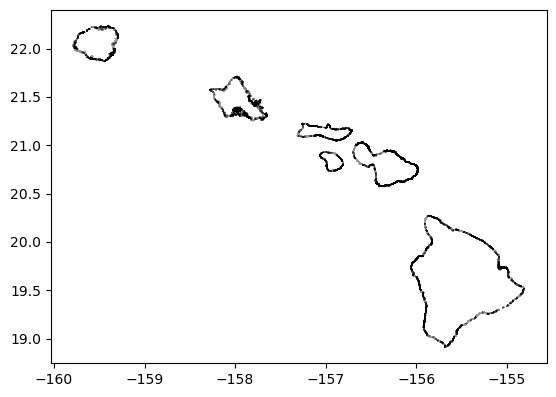

In [30]:
data12 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario_ShapeFile')
data12.plot(alpha=.4, color='gray', edgecolor='black')

### Sea Level Rise Exposure Data - 2.0 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/search?collection=Dataset&groupIds=a247b90d2fd14f60a64c0c75db5d5731

* `Description`: Estimated extent of chronic flooding due to multiple coastal hazards, modeled using a 2.0 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [31]:
data13 = pd.read_csv('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.csv')
data13.head(3)

,objectid,id,st_areashape,st_perimetershape
0,1,1,1.742507e+07,1.420933e+06
1,2,0,1.613553e+07,1.082830e+06
2,3,1,1.337530e+06,1.904737e+05


In [32]:
data14 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.geojson')
data14.head()

,objectid,id,st_areashape,st_perimetershape,geometry
0,1,1,1.742507e+07,1.420933e+06,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,2,0,1.613553e+07,1.082830e+06,"MULTIPOLYGON (((-159.78216 22.06026, -159.7821..."
2,3,1,1.337530e+06,1.904737e+05,"MULTIPOLYGON (((-156.91505 20.91916, -156.9150..."
3,4,0,9.846578e+06,8.195439e+05,"MULTIPOLYGON (((-156.50200 20.79698, -156.5020..."
4,5,1,6.620965e+06,6.483648e+05,"MULTIPOLYGON (((-157.11872 21.09841, -157.1187..."


In [33]:
data15 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.kml')
data15.head(3)

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,,,"MULTIPOLYGON (((-159.78216 22.06026, -159.7821..."
2,,,"MULTIPOLYGON (((-156.91505 20.91916, -156.9150..."


<Axes: >

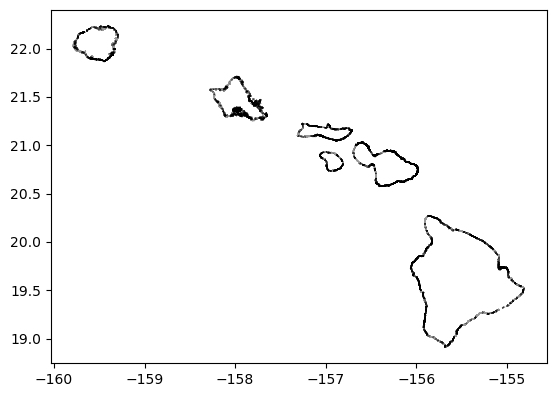

In [34]:
data16 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario_ShapeFile')
data16.plot(alpha=.4, color='gray', edgecolor='black')

### Sea Level Rise Potential Flooded Highways Data - 1.1 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/datasets/a3116b61d7b04cc6ba3ea10e632f991a_69/explore?location=21.472056%2C-158.059600%2C9.40

* `Description`: Estimated annual high wave flooding, modeled using a 1.1 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: st fullname, Highway fullname, lengthshape, Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [35]:
data17 = pd.read_csv('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario.csv')
data17.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rf_addr,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape
0,1,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18399,18359,0,0,0,Y,N,1,KAUMUALII HWY,176.605698
1,2,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18099,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315
2,3,678,1311,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,17999,17901,0,0,0,Y,N,1,KAUMUALII HWY,271.462677


In [36]:
data18 = gpd.read_file('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario.geojson')
data18.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape,geometry
0,1,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18359,0,0,0,Y,N,1,KAUMUALII HWY,176.605698,"MULTILINESTRING ((-159.71338 21.96639, -159.71..."
1,2,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315,"LINESTRING (-159.71946 21.96874, -159.72162 21..."
2,3,678,1311,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,17901,0,0,0,Y,N,1,KAUMUALII HWY,271.462677,"LINESTRING (-159.72162 21.96938, -159.72413 21..."


<Axes: >

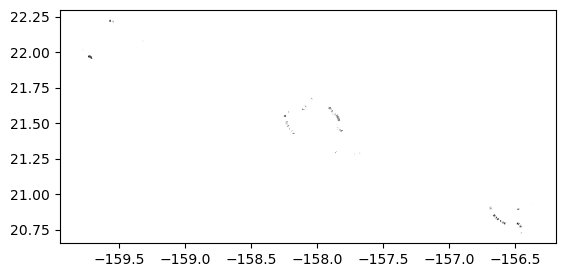

In [37]:
data19 = gpd.read_file('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario')
data19.plot(alpha=1, color='black', edgecolor='black')

### Sea Level Rise Potential Flooded Highways Data - 2.0 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/datasets/fd3ec2b57f734fe6aea7a066a81eb8b7_70/explore

* `Description`: Estimated annual high wave flooding, modeled using a 2.0 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: st fullname, Highway fullname, lengthshape, Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

In [38]:
data20 = pd.read_csv('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario.csv')
data20.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rf_addr,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape
0,1,608,2349,KUHIO HWY,,KUHIO,HWY,,HI-56,,...,,,0,0,0,Y,N,1,KUHIO HWY,381.844325
1,2,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18399,18359,0,0,0,Y,N,1,KAUMUALII HWY,297.249397
2,3,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18099,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315


In [39]:
data21 = gpd.read_file('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario.geojson')
data21.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape,geometry
0,1,608,2349,KUHIO HWY,,KUHIO,HWY,,HI-56,,...,,0,0,0,Y,N,1,KUHIO HWY,381.844325,"MULTILINESTRING ((-159.30674 22.09545, -159.30..."
1,2,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18359,0,0,0,Y,N,1,KAUMUALII HWY,297.249397,"MULTILINESTRING ((-159.71291 21.96605, -159.71..."
2,3,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315,"LINESTRING (-159.71946 21.96874, -159.72162 21..."


<Axes: >

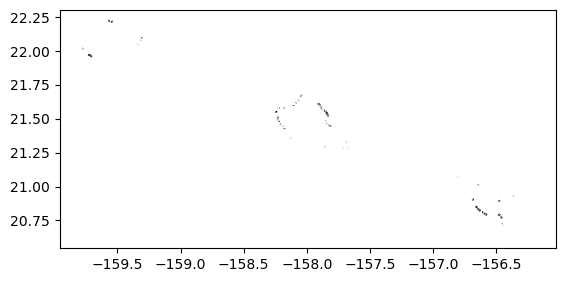

In [40]:
data22 = gpd.read_file('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario')
data22.plot(alpha=1, color='black', edgecolor='black')

### Sewer Main Oahu Data

Downloaded from: https://honolulu-cchnl.opendata.arcgis.com/datasets/sewer-mains/explore?location=21.315437%2C-158.094275%2C15.00

* `Description`: Main sewer lines in Oahu updated December 19, 2023
* `Source`:  HonoluluGIS Office - HOLIS City & County of Honolulu GIS
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile



In [41]:
data23 = pd.read_csv('data/sewer main/Sewer_-_Mains.csv')
data23.head(3)

,OBJECTID,ENABLED,SEWERID,ASSETID,BASINID,PROJECTID,STATUS,OWNER,DATEINSTALLED,DATEDIGITIZED,...,ESMT,HAZARD,MATERIAL,REHAB,DIAMETER,UPINVERT,DOWNINVERT,NEIGHBORHOOD,INSIDE_DIA,SHAPE_Length
0,1,1,458304,C-458304,SI,2296,ACT,CITY,1956/03/15 00:00:01+00,1990/09/30 00:00:00+00,...,NO,NO,VCP,NONE,8.0,125.23,107.71,Waialae-Kahala,NaN,0.000409
1,2,1,458507,C-458507,SI,2285,ACT,CITY,1956/04/01 00:00:01+00,1990/09/30 00:00:00+00,...,YES,NO,VCP,NONE,12.0,44.40,44.06,Waialae-Kahala,NaN,0.000224
2,3,1,458558,C-458558,SI,2243,ACT,CITY,1959/07/01 00:00:01+00,1990/09/30 00:00:00+00,...,YES,NO,VCP,NONE,8.0,26.50,25.42,Kuliouou-Kalani Iki,NaN,0.000751


In [42]:
data24 = gpd.read_file('data/sewer main/Sewer_-_Mains.geojson')
data24.head(3)

,OBJECTID,ENABLED,SEWERID,ASSETID,BASINID,PROJECTID,STATUS,OWNER,DATEINSTALLED,DATEDIGITIZED,...,HAZARD,MATERIAL,REHAB,DIAMETER,UPINVERT,DOWNINVERT,NEIGHBORHOOD,INSIDE_DIA,SHAPE_Length,geometry
0,1,1,458304,C-458304,SI,2296,ACT,CITY,1956-03-15 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,8.0,125.23,107.71,Waialae-Kahala,NaN,0.000409,"MULTILINESTRING ((-157.77784 21.28059, -157.77..."
1,2,1,458507,C-458507,SI,2285,ACT,CITY,1956-04-01 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,12.0,44.40,44.06,Waialae-Kahala,NaN,0.000224,"MULTILINESTRING ((-157.77931 21.27842, -157.77..."
2,3,1,458558,C-458558,SI,2243,ACT,CITY,1959-07-01 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,8.0,26.50,25.42,Kuliouou-Kalani Iki,NaN,0.000751,"MULTILINESTRING ((-157.78048 21.27741, -157.78..."


<Axes: >

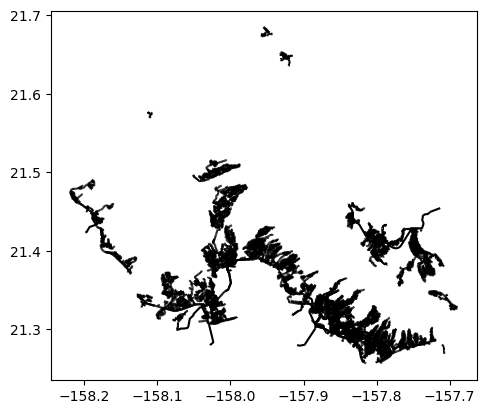

In [43]:
data25 = gpd.read_file('data/sewer main/Sewer_-_Mains')
data25.plot(alpha=1, color='black', edgecolor='black')

### Wastewater Treatment Plants Data 

Downloaded from: https://geoportal.hawaii.gov/datasets/wastewater-treatment-plants/explore?location=20.645530%2C-157.362250%2C8.00

* `Description`: Wastewater Treatment Plants as of January, 2023. 
* `Source`:  Hawaii Statewide GIS Program 
* `Lowest Geographic Scale`: Latitute, Longitude, address
* `Data formats available`: csv, geojson, kml

In [44]:
data26 = pd.read_csv('data/assisted living facilities/Assisted_Living_Facilities.csv')
data26.head(3)

,X,Y,objectid,name,address,city,zipcode,island,phone_num,license_exp,license_num
0,-157.848743,21.323116,1,15 Craigside,15 Craigside Place,Honolulu,96817,Oahu,8085237000,2022/06/30 00:00:00+00,16-ALF
1,-157.833433,21.301697,2,Arcadia Retirement Residence,1434 Punahou Street,Honolulu,96822,Oahu,8089410941,2023/08/31 00:00:00+00,1-ALF
2,-157.716056,21.292595,3,Hawaii Kai Retirement Comm Phase I and II,428 Kawaihae Street,Honolulu,96825,Oahu,8083959599,2022/04/30 00:00:00+00,12-ALF


In [45]:
data27 = gpd.read_file('data/assisted living facilities/Assisted_Living_Facilities.geojson')
data27.head(3)

,objectid,name,address,city,zipcode,island,phone_num,license_exp,license_num,geometry
0,1,15 Craigside,15 Craigside Place,Honolulu,96817,Oahu,8085237000,2022-06-30 00:00:00+00:00,16-ALF,POINT (-157.84874 21.32312)
1,2,Arcadia Retirement Residence,1434 Punahou Street,Honolulu,96822,Oahu,8089410941,2023-08-31 00:00:00+00:00,1-ALF,POINT (-157.83343 21.30170)
2,3,Hawaii Kai Retirement Comm Phase I and II,428 Kawaihae Street,Honolulu,96825,Oahu,8083959599,2022-04-30 00:00:00+00:00,12-ALF,POINT (-157.71606 21.29260)


In [46]:
data28 = gpd.read_file("data/assisted living facilities/Assisted_Living_Facilities.kml", driver="KML")
data28.head(3)

,Name,Description,geometry
0,15 Craigside,,POINT (-157.84874 21.32312)
1,Arcadia Retirement Residence,,POINT (-157.83343 21.30170)
2,Hawaii Kai Retirement Comm Phase I and II,,POINT (-157.71606 21.29260)


### Public Schools Data

Downloaded from: https://geoportal.hawaii.gov/datasets/public-schools/explore?location=20.623840%2C-157.481550%2C8.26

* `Description`: Public School locations for the main Hawaiian Islands as of July 2023.NOTE: This data layer shows the location and status of public schools BEFORE THE MAUI WILDFIRES OF AUGUST 2023. 
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
sch_code: School Code
sch_name: Name of School
address: Address
city: City
zip: Zipcode
phone: Phone Number
fax: Fax Number
Principal: Name of Principal
grade_from: Grade begins 
grade_to: Grade ends
sch_type: Elementary, Middle, High
website: Websites
complex:
complex_area:
district: District
island: Island
charter: 0 - No, 1 - Yes

```

In [68]:
data29 = gpd.read_file("data/public schools/Public_Schools.csv")
data29.head(3)

,X,Y,objectid,sch_code,sch_name,address,city,zip,phone,fax,...,grade_to,sch_type,website,complex,complex_area,district,island,charter,editdate,geometry
0,-158.000581541559,21.3931193128623,1,250,Ahrens Elementary,94-1170 Waipahu Street,Waipahu,96797,808.675.0202,808.675.0216,...,6,Elementary,http://www.augustahrens.org/,Waipahu,Pearl City-Waipahu,Leeward,Oahu,0,2023/02/02 00:00:00+00,None
1,-157.830406613347,21.4355995288096,2,335,Ahuimanu Elementary,47-470 Hui Aeko Place,Kaneohe,96744,808.239.3125,808.239.3127,...,6,Elementary,https://sites.google.com/a/ahuimanu.k12.hi.us/...,Castle,Castle-Kahuku,Windward,Oahu,0,2023/02/02 00:00:00+00,None
2,-157.928745873278,21.3760784996726,3,200,Aiea Elementary,99-370 Moanalua Road,Aiea,96701,808.305.4400,808.483.7201,...,6,Elementary,http://www.aieaelementary.com/,Aiea,Aiea Moanalua-Radford,Central,Oahu,0,2023/02/02 00:00:00+00,None


In [69]:
data30 = gpd.read_file("data/public schools/Public_Schools.geojson")
data30.head(3)

,objectid,sch_code,sch_name,address,city,zip,phone,fax,principal,grade_from,grade_to,sch_type,website,complex,complex_area,district,island,charter,editdate,geometry
0,1,250,Ahrens Elementary,94-1170 Waipahu Street,Waipahu,96797,808.675.0202,808.675.0216,Hanh Quang Nguyen,K,6,Elementary,http://www.augustahrens.org/,Waipahu,Pearl City-Waipahu,Leeward,Oahu,0,2023-02-02 00:00:00+00:00,POINT (-158.00058 21.39312)
1,2,335,Ahuimanu Elementary,47-470 Hui Aeko Place,Kaneohe,96744,808.239.3125,808.239.3127,Kimi Yuki Ikeda,K,6,Elementary,https://sites.google.com/a/ahuimanu.k12.hi.us/...,Castle,Castle-Kahuku,Windward,Oahu,0,2023-02-02 00:00:00+00:00,POINT (-157.83041 21.43560)
2,3,200,Aiea Elementary,99-370 Moanalua Road,Aiea,96701,808.305.4400,808.483.7201,James L Kau,K,6,Elementary,http://www.aieaelementary.com/,Aiea,Aiea Moanalua-Radford,Central,Oahu,0,2023-02-02 00:00:00+00:00,POINT (-157.92875 21.37608)


In [70]:
data31 = gpd.read_file("data/public schools/Public_Schools.kml", driver="KML")
data31.head(3)

,Name,Description,geometry
0,,,POINT (-158.00058 21.39312)
1,,,POINT (-157.83041 21.43560)
2,,,POINT (-157.92875 21.37608)


<Axes: >

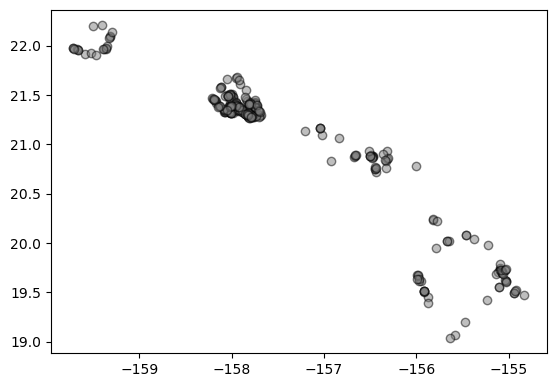

In [71]:
data32 = gpd.read_file('data/public schools/Public_Schools')
data32.plot(alpha=0.5, color='grey', edgecolor='black')

### Preschools Data

Downloaded from: https://geoportal.hawaii.gov/datasets/preschools/explore?location=20.605675%2C-157.298450%2C8.00

* `Description`: Locations of Preschools, Early Education and Early Childcare Centers in the State of Hawaii as of December 2021.
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
name: Name of School
address: Address
city: City
zip: Zipcode
island_dist: Island
type: Licensed Infant/Toddler Center, Public-private partnership, Charter, DOE
source: PATCH, EOEL

```

In [53]:
data33 = gpd.read_file("data/preschools/Preschools.csv")
data33.head(3)

,X,Y,objectid,name,address,city,zip,island_dist,type,source,geometry
0,-157.847108763973,21.3009289180106,1,Kamaaina Kids - King Street Infant/Toddler Pro...,1054 King St,Honolulu,96814,Oahu,Licensed Infant/Toddler Center,PATCH,None
1,-157.966735499865,21.3930630001492,2,Kamaaina Kids Pearl City Infant Toddler Program,784 Kamehameha Hwy,Pearl City,96782,Oahu,Licensed Infant/Toddler Center,PATCH,None
2,-157.820080696714,21.2752237039386,3,Waikiki Community Center Preschool - IT,310 Paoakalani Avenue,Honolulu,96815,Oahu,Licensed Infant/Toddler Center,PATCH,None


In [54]:
data34 = gpd.read_file("data/preschools/Preschools.geojson")
data34.head(3)

,objectid,name,address,city,zip,island_dist,type,source,geometry
0,1,Kamaaina Kids - King Street Infant/Toddler Pro...,1054 King St,Honolulu,96814,Oahu,Licensed Infant/Toddler Center,PATCH,POINT (-157.84711 21.30093)
1,2,Kamaaina Kids Pearl City Infant Toddler Program,784 Kamehameha Hwy,Pearl City,96782,Oahu,Licensed Infant/Toddler Center,PATCH,POINT (-157.96674 21.39306)
2,3,Waikiki Community Center Preschool - IT,310 Paoakalani Avenue,Honolulu,96815,Oahu,Licensed Infant/Toddler Center,PATCH,POINT (-157.82008 21.27522)


In [55]:
data35 = gpd.read_file("data/preschools/Preschools.kml", driver="KML")
data35.head(3)

,Name,Description,geometry
0,Kamaaina Kids - King Street Infant/Toddler Pro...,,POINT (-157.84711 21.30093)
1,Kamaaina Kids Pearl City Infant Toddler Program,,POINT (-157.96674 21.39306)
2,Waikiki Community Center Preschool - IT,,POINT (-157.82008 21.27522)


<Axes: >

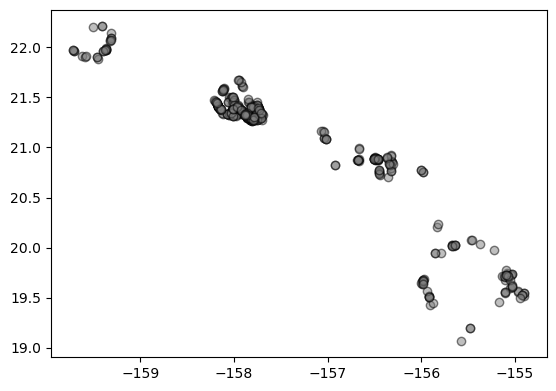

In [56]:
data36 = gpd.read_file('data/preschools/Preschools')
data36.plot(alpha=0.5, color='grey', edgecolor='black')

### Private Schools Data

Downloaded from: https://geoportal.hawaii.gov/datasets/private-schools/explore

* `Description`: Private School locations for the main Hawaiian Islands as of November 2021. 
* `Source`:  Hawaii Association of Independent Schools (HAIS).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
school: Name of School
address: Address
alt_address: Alternate Address
city: City
city_dist: City District
island: Island
state: HI
zip: Zipcode
website: Website
grades: Grades starting from/to
gender: Co-ed, Girls Only, Boys Only
tuition21: Tuition per grade

```

In [57]:
data34 = gpd.read_file("data/private schools/Private_Schools.csv")
data34.head(3)

,X,Y,objectid,school,address,alt_address,city,cty_dist,island,state,zipcode,website,grades,gender,tuition21,faculty21,enrollment21,geometry
0,-158.185067325118,21.438037300676,1,Adventist Malama Elementary School,86-072 Farrington Hwy.,,Waianae,Oahu - Central/Leeward,Oahu,HI,96792,http://www.adventistmalama.org,K-8,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3,55,None
1,-157.036234730822,21.1518068003414,2,Aka'ula School,1000 Kalae Highway,,Kualapuu,Molokai,Molokai,HI,96757,www.akaula.org,5th thru 12th,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3,34,None
2,-157.917217158388,21.6148589020526,3,"Asia Pacific International School, Hawaii Campus",54-230 Kamehameha Hwy.,,Hauula,Oahu - Windward/North Shore,Oahu,HI,96717,www.apishawaii.org,K-12,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,16,150,None


In [58]:
data35 = gpd.read_file("data/private schools/Private_Schools.geojson")
data35.head(3)

,objectid,school,address,alt_address,city,cty_dist,island,state,zipcode,website,grades,gender,tuition21,faculty21,enrollment21,geometry
0,1,Adventist Malama Elementary School,86-072 Farrington Hwy.,None,Waianae,Oahu - Central/Leeward,Oahu,HI,96792.0,http://www.adventistmalama.org,K-8,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3.0,55,POINT (-158.18507 21.43804)
1,2,Aka'ula School,1000 Kalae Highway,None,Kualapuu,Molokai,Molokai,HI,96757.0,www.akaula.org,5th thru 12th,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3.0,34,POINT (-157.03623 21.15181)
2,3,"Asia Pacific International School, Hawaii Campus",54-230 Kamehameha Hwy.,None,Hauula,Oahu - Windward/North Shore,Oahu,HI,96717.0,www.apishawaii.org,K-12,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,16.0,150,POINT (-157.91722 21.61486)


In [59]:
data36 = gpd.read_file("data/private schools/Private_Schools.kml", driver="KML")
data36.head(3)

,Name,Description,geometry
0,,,POINT (-158.18507 21.43804)
1,,,POINT (-157.03623 21.15181)
2,,,POINT (-157.91722 21.61486)


<Axes: >

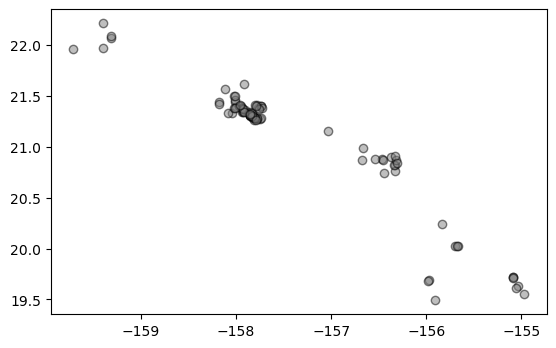

In [60]:
data37 = gpd.read_file('data/private schools/Private_Schools')
data37.plot(alpha=0.5, color='grey', edgecolor='black')

### Community Care Foster Family Homes Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::community-care-foster-family-homes/about

* `Description`: Community Care Foster Family Home in the State of Hawaii as of November 2021 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
fname: Firstname
lname: Lastname
pyhsstreet: Street 
physical_city: City
physicalzip: Zip code
physisland: Island
mailstreet: Mail box address
mailcity: Mail Zip code
mailstate: Mail State
mailzip: Mail Zip
mailisland: Mail Island
phone: Phone number
alt_phone: Alternate phone number
cert_date: Certified date
renew_date: Renew data
numbeds: Number of beds


In [63]:
data35 = pd.read_csv("data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes.csv")
data35.head(3)

,X,Y,objectid,provider_id,fname,lname,physstreet,physical_city,physstate,physicalzip,...,mailstreet,mailcity,mailstate,mailzip,mailisland,phone,alt_phone,cert_date,renew_date,numbeds
0,-158.032344,21.387534,1,1-561929,Andrea,"Abad, CNA",94-685 Kalae Street,Waipahu,HI,96797,...,94-685 Kalae Street,Waipahu,HI,96797,Oahu,(808) 671-5110,(808) 392-5324,2021/06/01 00:00:00+00,2022/05/31 00:00:00+00,2
1,-158.010101,21.394113,2,1-170054,Mayrose,"Abadilla, CNA",94-992 Kualua Place,Waipahu,HI,96797,...,94-992 Kualua Place,Waipahu,HI,96797,Oahu,(808) 772-4018,(808) 778-4730,2021/10/01 00:00:00+00,2023/09/30 00:00:00+00,3
2,-158.028229,21.355136,3,1-160007,Lani,"Abara, CNA",91-1032 Hamana Street,Ewa Beach,HI,96706,...,91-1032 Hamana Street,Ewa Beach,HI,96706,Oahu,(808) 681-3373,(808) 266-0379,2021/03/17 00:00:00+00,2023/03/16 00:00:00+00,3


In [64]:
data36 = gpd.read_file("data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes.geojson")
data36.head(3)

,objectid,provider_id,fname,lname,physstreet,physical_city,physstate,physicalzip,physisland,mailstreet,mailcity,mailstate,mailzip,mailisland,phone,alt_phone,cert_date,renew_date,numbeds,geometry
0,1,1-561929,Andrea,"Abad, CNA",94-685 Kalae Street,Waipahu,HI,96797,Oahu,94-685 Kalae Street,Waipahu,HI,96797,Oahu,(808) 671-5110,(808) 392-5324,2021-06-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,2,POINT (-158.03234 21.38753)
1,2,1-170054,Mayrose,"Abadilla, CNA",94-992 Kualua Place,Waipahu,HI,96797,Oahu,94-992 Kualua Place,Waipahu,HI,96797,Oahu,(808) 772-4018,(808) 778-4730,2021-10-01 00:00:00+00:00,2023-09-30 00:00:00+00:00,3,POINT (-158.01010 21.39411)
2,3,1-160007,Lani,"Abara, CNA",91-1032 Hamana Street,Ewa Beach,HI,96706,Oahu,91-1032 Hamana Street,Ewa Beach,HI,96706,Oahu,(808) 681-3373,(808) 266-0379,2021-03-17 00:00:00+00:00,2023-03-16 00:00:00+00:00,3,POINT (-158.02823 21.35514)


In [65]:
data37 = gpd.read_file("data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes.kml")
data37.head(3)

,Name,Description,geometry
0,,,POINT (-158.03234 21.38753)
1,,,POINT (-158.01010 21.39411)
2,,,POINT (-158.02823 21.35514)


<Axes: >

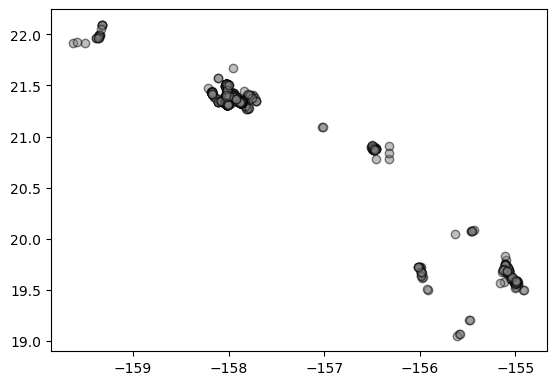

In [67]:
data38 = gpd.read_file('data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes')
data38.plot(alpha=0.5, color='grey', edgecolor='black')

### Household Income Data

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B19001?t=Income%20and%20Poverty&g=040XX00US15$1500000&tid=ACSDT5Y2019.B19001

* `Description`: Household Income in the Past 12 Months (2013 - 2021)
* `Source`:  American Community Survey, US Census Bureau
* `GEO_ID`: 1500000US150010201001 (FIPS code 1500000US:Country, 15:Hawaii State, 001:County, 02010:Census Track,01:Blockgroup)
* `Data formats available`: csv
```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B19001_001E	Estimate Total
B19001_001M	Margin of Error Total
B19001_002E	Estimate Total Less than $10,000
B19001_002M	Margin of Error Total Less than $10,000
B19001_003E	Estimate!!Total!!$10,000 to $14,999
B19001_003M	Margin of Error!!Total!!$10,000 to $14,999
B19001_004E	Estimate!!Total!!$15,000 to $19,999
B19001_004M	Margin of Error!!Total!!$15,000 to $19,999
B19001_005E	Estimate!!Total!!$20,000 to $24,999
B19001_005M	Margin of Error!!Total!!$20,000 to $24,999
B19001_006E	Estimate!!Total!!$25,000 to $29,999
B19001_006M	Margin of Error!!Total!!$25,000 to $29,999
B19001_007E	Estimate!!Total!!$30,000 to $34,999
B19001_007M	Margin of Error!!Total!!$30,000 to $34,999
B19001_008E	Estimate!!Total!!$35,000 to $39,999
B19001_008M	Margin of Error!!Total!!$35,000 to $39,999
B19001_009E	Estimate!!Total!!$40,000 to $44,999
B19001_009M	Margin of Error!!Total!!$40,000 to $44,999
B19001_010E	Estimate!!Total!!$45,000 to $49,999
B19001_010M	Margin of Error!!Total!!$45,000 to $49,999
B19001_011E	Estimate!!Total!!$50,000 to $59,999
B19001_011M	Margin of Error!!Total!!$50,000 to $59,999
B19001_012E	Estimate!!Total!!$60,000 to $74,999
B19001_012M	Margin of Error!!Total!!$60,000 to $74,999
B19001_013E	Estimate!!Total!!$75,000 to $99,999
B19001_013M	Margin of Error!!Total!!$75,000 to $99,999
B19001_014E	Estimate!!Total!!$100,000 to $124,999
B19001_014M	Margin of Error!!Total!!$100,000 to $124,999
B19001_015E	Estimate!!Total!!$125,000 to $149,999
B19001_015M	Margin of Error!!Total!!$125,000 to $149,999
B19001_016E	Estimate!!Total!!$150,000 to $199,999
B19001_016M	Margin of Error!!Total!!$150,000 to $199,999
B19001_017E	Estimate!!Total!!$200,000 or more
B19001_017M	Margin of Error!!Total!!$200,000 or more
```

In [76]:
#2013 Household Income
data39 = pd.read_csv('data/household income/ACSDT5Y2013.B19001-Data.csv')
data39.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",761,108,153,53,78,37,35,25,...,40,44,41,33,19,9,8,3,4,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",347,84,6,8,16,13,21,12,...,26,87,73,4,7,3,6,5,7,NaN


In [77]:
#2014 Household Income
data40 = pd.read_csv('data/household income/ACSDT5Y2014.B19001-Data.csv')
data40.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",677,95,109,37,78,35,28,22,...,37,45,41,35,21,11,8,3,4,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",315,80,6,7,17,13,20,12,...,27,60,59,4,7,1,3,4,7,NaN


In [78]:
#2015 Household Income
data41 = pd.read_csv('data/household income/ACSDT5Y2015.B19001-Data.csv')
data41.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",645,98,89,38,75,34,16,15,...,33,71,47,32,22,8,5,6,5,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",318,87,4,6,37,40,13,12,...,27,55,56,5,7,2,3,4,7,NaN


In [79]:
#2016 Household Income
data42 = pd.read_csv('data/household income/ACSDT5Y2016.B19001-Data.csv')
data42.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",651,75,83,32,65,24,22,17,...,29,72,44,16,10,23,15,6,5,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",331,85,4,6,35,40,15,12,...,22,69,60,0,11,0,11,4,8,NaN


In [80]:
#2017 Household Income
data43 = pd.read_csv('data/household income/ACSDT5Y2017.B19001-Data.csv')
data43.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",705,84,63,32,94,38,25,20,...,24,61,40,16,10,41,23,17,12,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",314,86,5,7,11,12,41,43,...,22,47,47,9,9,13,20,5,8,NaN


In [81]:
#2018 Household Income
data44 = pd.read_csv('data/household income/ACSDT5Y2018.B19001-Data.csv')
data44.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",760,86,61,28,90,40,16,10,...,34,69,53,35,19,43,24,33,21,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",276,83,5,8,11,12,37,46,...,24,13,13,43,44,17,22,3,5,NaN


In [82]:
#2019 Household Income
data45 = pd.read_csv('data/household income/ACSDT5Y2019.B19001-Data.csv')
data45.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,"Estimate!!Total:!!Less than $10,000","Margin of Error!!Total:!!Less than $10,000","Estimate!!Total:!!$10,000 to $14,999","Margin of Error!!Total:!!$10,000 to $14,999","Estimate!!Total:!!$15,000 to $19,999","Margin of Error!!Total:!!$15,000 to $19,999",...,"Margin of Error!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Margin of Error!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Margin of Error!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Margin of Error!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more","Margin of Error!!Total:!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",758,120,82,36,85,36,10,10,...,36,84,47,52,27,42,24,50,25,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",332,100,43,54,14,12,38,47,...,23,15,13,10,12,51,53,9,8,NaN


In [83]:
#2020 Household Income
data46 = pd.read_csv('data/household income/ACSDT5Y2020.B19001-Data.csv')
data46.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,"Estimate!!Total:!!Less than $10,000","Margin of Error!!Total:!!Less than $10,000","Estimate!!Total:!!$10,000 to $14,999","Margin of Error!!Total:!!$10,000 to $14,999","Estimate!!Total:!!$15,000 to $19,999","Margin of Error!!Total:!!$15,000 to $19,999",...,"Margin of Error!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Margin of Error!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Margin of Error!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Margin of Error!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more","Margin of Error!!Total:!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",537,101,78,33,33,25,9,8,...,34,41,32,32,29,32,29,10,17,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",238,73,39,48,8,9,2,4,...,10,40,23,9,11,32,42,22,23,NaN


In [84]:
#2021 Household Income
data47 = pd.read_csv('data/household income/ACSDT5Y2021.B19001-Data.csv')
data47.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,"Estimate!!Total:!!Less than $10,000","Margin of Error!!Total:!!Less than $10,000","Estimate!!Total:!!$10,000 to $14,999","Margin of Error!!Total:!!$10,000 to $14,999","Estimate!!Total:!!$15,000 to $19,999","Margin of Error!!Total:!!$15,000 to $19,999",...,"Margin of Error!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Margin of Error!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Margin of Error!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Margin of Error!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more","Margin of Error!!Total:!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",522,96,37,21,39,26,14,16,...,42,64,36,27,27,30,23,21,22,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",247,72,32,41,11,10,0,12,...,11,30,21,9,8,58,38,22,23,NaN


### Aggregate Income Deficit Data

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B17011?g=040XX00US15$1500000&y=2019&tid=ACSDT5Y2019.B17011

* `Description`: Aggregate Income Deficit (Dollars) in the past 12 months for Families by Family Type, 2019
* `Source`:  American Community Survey, US Census Bureau
* `GEO_ID`: 1500000US150010201001 (FIPS code 1500000US:Country, 15:Hawaii State, 001:County, 02010:Census Track,01:Blockgroup)
* `Data formats available`: csv
```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B17011_001E	Estimate!!Aggregate income deficit in the past 12 months:
B17011_001M	Margin of Error!!Aggregate income deficit in the past 12 months:
B17011_002E	Estimate!!Aggregate income deficit in the past 12 months:!!Married-couple family
B17011_002M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Married-couple family
B17011_003E	Estimate!!Aggregate income deficit in the past 12 months:!!Other family:
B17011_003M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Other family:
B17011_004E	Estimate!!Aggregate income deficit in the past 12 months:!!Other family:!!Male householder, no spouse present
B17011_004M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Other family:!!Male householder, no spouse present
B17011_005E	Estimate!!Aggregate income deficit in the past 12 months:!!Other family:!!Female householder, no spouse present
B17011_005M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Other family:!!Female householder, no spouse present!

```

In [85]:
data48 = pd.read_csv('data/aggregate_income_deficit/ACSDT5Y2019.B17011-Data.csv')
data48.head(3)

,GEO_ID,NAME,B17011_001E,B17011_001M,B17011_002E,B17011_002M,B17011_003E,B17011_003M,B17011_004E,B17011_004M,B17011_005E,B17011_005M,Unnamed: 12
0,Geography,Geographic Area Name,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",785400,570725,89000,81314,696500,582055,222800,271221,473600,524887,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Developmental Disabilities Domiciliary Homes Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::developmental-disabilities-domiciliary-homes/about

* `Description`: Locations of developmental disabilities domiciliary homes in the State of Hawaii as of November 2021.
* `Source`: Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
facname: Facility name
street: Street 
city: City
zip: Zip code
island: Island
phone: Phone number
lic_exp: License Expiration
license_num: License Number
```

In [86]:
data49 = pd.read_csv("data/develpmental disabilities homes/Developmental_Disabilities_Domiciliary_Homes.csv")
data49.head(3)

,X,Y,objectid,facname,street,city,zip,island,phone,lic_exp,license_num
0,-157.998500,21.389419,1,Alma and Richard Pilar,94-1105 Kahuanui Street,Waipahu,96797,Oahu,8086809569,2022/02/28 00:00:00+00,89-D
1,-157.956811,21.424113,2,"Aloha Adult DD Domiciliary Home, LLC",2235 Auhuhu Street,Pearl City,96782,Oahu,8084554050,2022/07/31 00:00:00+00,83-D
2,-157.994143,21.403184,3,Aloha Care,94-983 Lumihoahu Street,Waipahu,96797,Oahu,8086716946,2022/07/31 00:00:00+00,65-D


In [87]:
data50 = gpd.read_file("data/develpmental disabilities homes/Developmental_Disabilities_Domiciliary_Homes.geojson")
data50.head(3)

,objectid,facname,street,city,zip,island,phone,lic_exp,license_num,geometry
0,1,Alma and Richard Pilar,94-1105 Kahuanui Street,Waipahu,96797,Oahu,8086809569,2022-02-28 00:00:00+00:00,89-D,POINT (-157.99850 21.38942)
1,2,"Aloha Adult DD Domiciliary Home, LLC",2235 Auhuhu Street,Pearl City,96782,Oahu,8084554050,2022-07-31 00:00:00+00:00,83-D,POINT (-157.95681 21.42411)
2,3,Aloha Care,94-983 Lumihoahu Street,Waipahu,96797,Oahu,8086716946,2022-07-31 00:00:00+00:00,65-D,POINT (-157.99414 21.40318)


<Axes: >

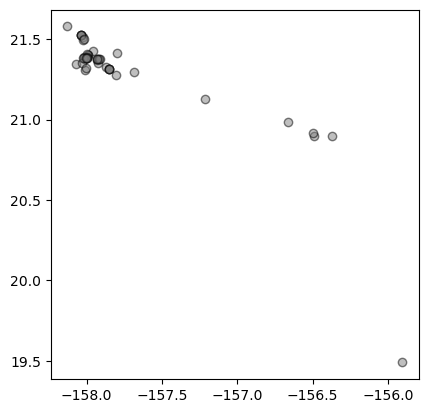

In [88]:
data51 = gpd.read_file("data/develpmental disabilities homes/Developmental_Disabilities_Domiciliary_Homes")
data51.plot(alpha=0.5, color='grey', edgecolor='black')

### Skilled Nursing Facilities Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::skilled-nursing-facilities/about

* `Description`: Skilled Nursing Facilities in the State of Hawaii as of November 2021.
* `Source`: Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
name: Facility name
licensed_beds: Number of Licensed Beds
mailing_address: Mailing Address
physical_address: Physical Address
island: Island
phone: Phone number
fax: Fax number
POC: Point of Contact
website: Website URL
cert_num: Certification number
adult_day: Adult Day Yes/
```

In [89]:
data52 = pd.read_csv("data/skilled nursing facilities/Skilled_Nursing_Facilities.csv")
data52.head(3)

,X,Y,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,adult_day,cert_num
0,-157.848941,21.323174,1,15 CRAIGSIDE,41,OAHU,"15 Craigside Place, Honolulu, Hawaii 96817",NaN,(808) 523-7000,NaN,(888) 446-3218,"Keleka Ho’okano, Administrator; Bree Komagome,...",https://arcadia.org/15-craigside,NaN,125063.0
1,-157.797666,21.398391,2,ALOHA NURSING & REHAB CENTRE,141,OAHU,"45-545 Kamehameha Highway, Kaneohe, Hawaii 96744",NaN,(808) 247-2220,NaN,(808) 235-3676,"Amy Lee, NHA and Chief Executive Officer",https://www.alohanursing.com/,NaN,125038.0
2,-157.795144,21.414517,3,ANN PEARL NURSING FACILITY,104,OAHU,"45-181 Waikalua Road, Kaneohe, Hawaii 96744",NaN,(808) 247-8558,NaN,(808) 247-4115,"Alisa Racelo, Administrator",https://ohanapacific.com/locations/oahu/kaneoh...,Yes,125048.0


In [90]:
data53 = gpd.read_file("data/skilled nursing facilities/Skilled_Nursing_Facilities.geojson")
data53.head(3)

,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,adult_day,cert_num,geometry
0,1,15 CRAIGSIDE,41,OAHU,"15 Craigside Place, Honolulu, Hawaii 96817",None,(808) 523-7000,None,(888) 446-3218,"Keleka Ho’okano, Administrator; Bree Komagome,...",https://arcadia.org/15-craigside,None,125063.0,POINT (-157.84894 21.32317)
1,2,ALOHA NURSING & REHAB CENTRE,141,OAHU,"45-545 Kamehameha Highway, Kaneohe, Hawaii 96744",None,(808) 247-2220,None,(808) 235-3676,"Amy Lee, NHA and Chief Executive Officer",https://www.alohanursing.com/,None,125038.0,POINT (-157.79767 21.39839)
2,3,ANN PEARL NURSING FACILITY,104,OAHU,"45-181 Waikalua Road, Kaneohe, Hawaii 96744",None,(808) 247-8558,None,(808) 247-4115,"Alisa Racelo, Administrator",https://ohanapacific.com/locations/oahu/kaneoh...,Yes,125048.0,POINT (-157.79514 21.41452)


In [91]:
data54 = gpd.read_file("data/skilled nursing facilities/Skilled_Nursing_Facilities.kml")
data54.head(3)

,Name,Description,geometry
0,15 CRAIGSIDE,,POINT (-157.84894 21.32317)
1,ALOHA NURSING & REHAB CENTRE,,POINT (-157.79767 21.39839)
2,ANN PEARL NURSING FACILITY,,POINT (-157.79514 21.41452)


<Axes: >

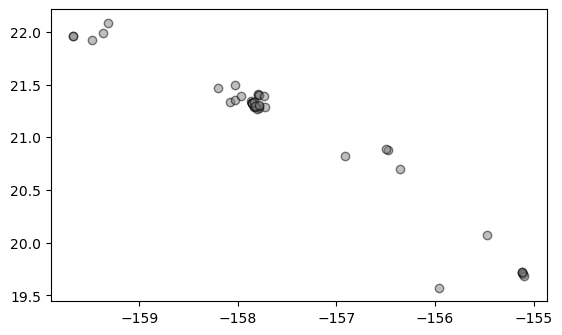

In [93]:
data54 = gpd.read_file("data/skilled nursing facilities/Skilled_Nursing_Facilities")
data54.plot(alpha=0.5, color='grey', edgecolor='black')

### Fire Station (Statewide) Data

Downloaded from: https://geoportal.hawaii.gov/datasets/hospitals-1/explore?location=20.639400%2C-157.361100%2C8.61&showTable=true

* `Description`: Locations of fire stations within the State of Hawaii, as of August, 2017 
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
X: Latitude
Y: Longitude
objectid: Object ID
name: Fire Station Name
island: Island
```

In [96]:
data55 = pd.read_csv("data/fire stations/Fire_Stations_Statewide.csv")
data55.head(3)

,X,Y,objectid,name,island
0,-155.079486,19.683677,1,Kawailani Fire Station,Hawaii
1,-155.086191,19.720312,2,Central Fire Station,Hawaii
2,-155.661209,20.023131,3,Waimea Fire Station,Hawaii


In [97]:
data56 = gpd.read_file("data/fire stations/Fire_Stations_Statewide.geojson")
data56.head(3)

,objectid,name,island,geometry
0,1,Kawailani Fire Station,Hawaii,POINT (-155.07949 19.68368)
1,2,Central Fire Station,Hawaii,POINT (-155.08619 19.72031)
2,3,Waimea Fire Station,Hawaii,POINT (-155.66121 20.02313)


In [98]:
data57 = gpd.read_file("data/fire stations/Fire_Stations_Statewide.kml")
data57.head(3)

,Name,Description,geometry
0,Kawailani Fire Station,,POINT (-155.07949 19.68368)
1,Central Fire Station,,POINT (-155.08619 19.72031)
2,Waimea Fire Station,,POINT (-155.66121 20.02313)


<Axes: >

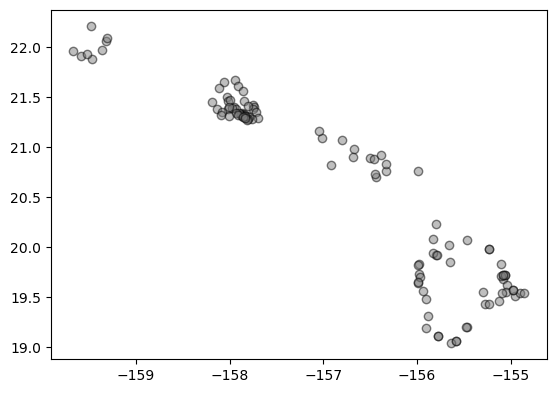

In [100]:
data58 = gpd.read_file("data/fire stations/Fire_Stations_Statewide")
data58.plot(alpha=0.5, color='grey', edgecolor='black')

### Police Station (Statewide) Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::police-stations-statewide/about

* `Description`: Locations of police stations within the State of Hawaii, as of August, 2017. 
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml, shapefile

```
X: Latitude
Y: Longitude
objectid: Object ID
name: Fire Station Name
island: Island
```

In [101]:
data59 = pd.read_csv("data/police stations/Police_Stations_Statewide.csv")
data59.head(3)

,X,Y,objectid,name,island
0,-159.354983,21.977018,1,KAUAI COUNTY POLICE DEPARTMENT,Kauai
1,-159.479153,22.212255,2,HANALEI POLICE SUBSTATION,Kauai
2,-159.667144,21.956696,3,WAIMEA POLICE SUBSTATION,Kauai


In [102]:
data60 = gpd.read_file("data/police stations/Police_Stations_Statewide.geojson")
data60.head(3)

,objectid,name,island,geometry
0,1,KAUAI COUNTY POLICE DEPARTMENT,Kauai,POINT (-159.35498 21.97702)
1,2,HANALEI POLICE SUBSTATION,Kauai,POINT (-159.47915 22.21226)
2,3,WAIMEA POLICE SUBSTATION,Kauai,POINT (-159.66714 21.95670)


In [103]:
data61 = gpd.read_file("data/police stations/Police_Stations_Statewide.kml")
data61.head(3)

,Name,Description,geometry
0,KAUAI COUNTY POLICE DEPARTMENT,,POINT (-159.35498 21.97702)
1,HANALEI POLICE SUBSTATION,,POINT (-159.47915 22.21226)
2,WAIMEA POLICE SUBSTATION,,POINT (-159.66714 21.95670)


<Axes: >

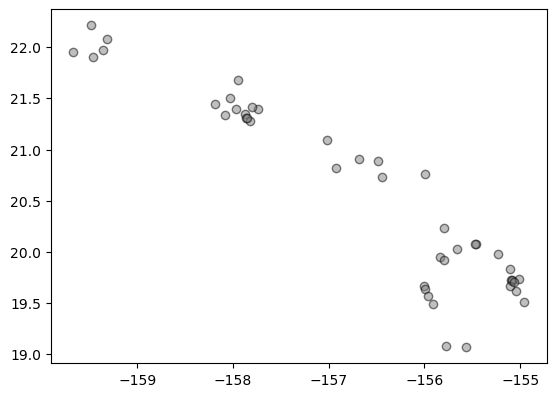

In [104]:
data62 = gpd.read_file("data/police stations/Police_Stations_Statewide")
data62.plot(alpha=0.5, color='grey', edgecolor='black')